# Example for running simulation code

In [1]:
import numpy as np
from bandits.agent import Agent
from bandits.bandit import GaussianBandit
from bandits import policy as pc
from bandits.simulation import Simulator

# this example uses 10 arms with each a mean selected from a normal distribution with mean 0 and variance 1
k = 10
mu = np.zeros(10)
sigma = np.ones(10)
for arm in range(k):
    mu[arm] = np.random.normal(0, 1)

bandit = GaussianBandit(k, mu, sigma)
agents = [
    Agent(bandit, pc.GreedyPolicy()),
    Agent(bandit, pc.EpsilonGreedyPolicy(epsilon=0.1)),
    Agent(bandit, pc.UCBPolicy(c=2)),
#     Agent(bandit, pc.ThompsonSampling()),
]
sim = Simulator(bandit, agents)

In [2]:
import time
start = time.time()
n_trials = 1000
n_experiments = 2000
rewards, is_optimal, actions = sim.run(n_trials, n_experiments)
print(time.time() - start)

149.95111060142517


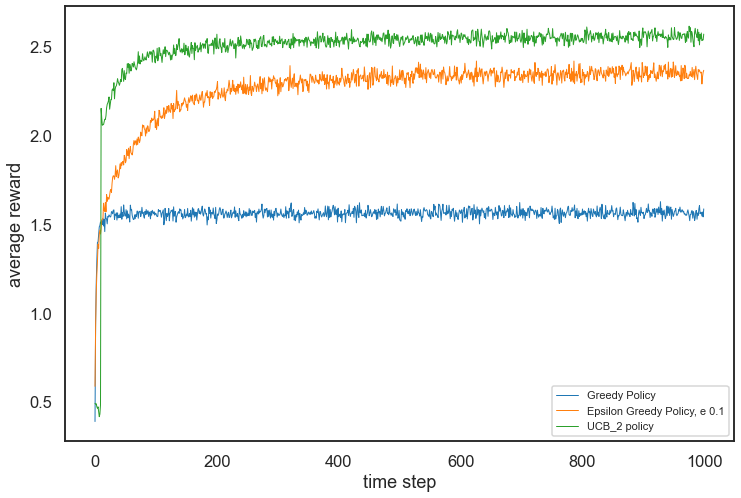

In [3]:
sim.plot_average_reward(rewards)

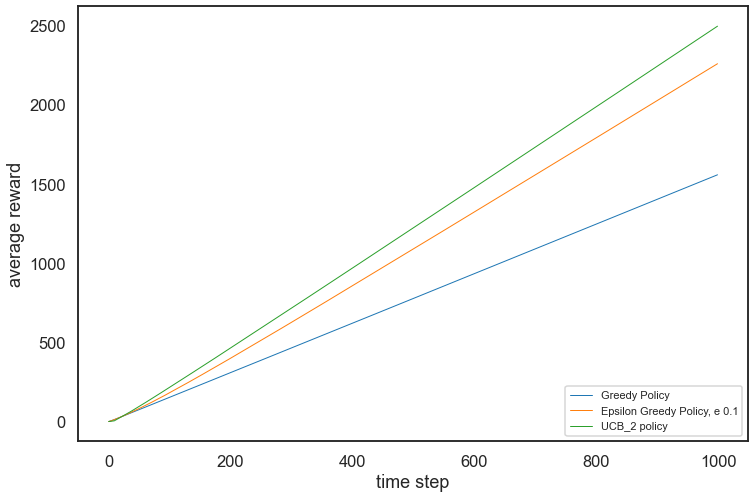

In [4]:
# cumulative reward
sim.plot_average_reward(np.cumsum(rewards, axis=0))

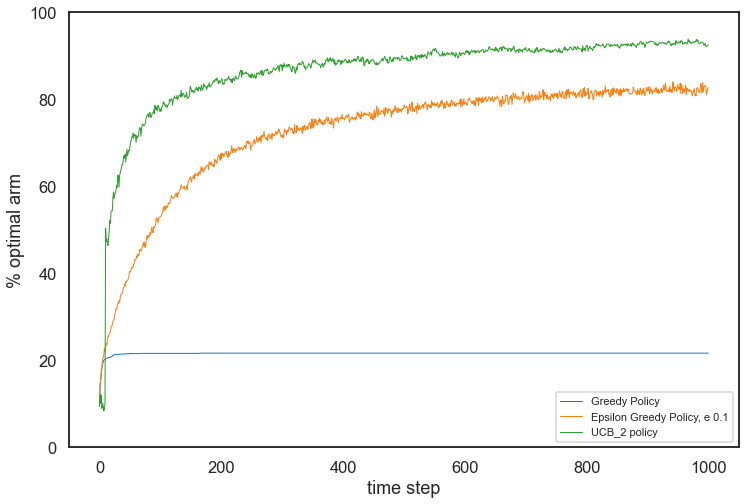

In [5]:
sim.plot_percentage_optimal(is_optimal)

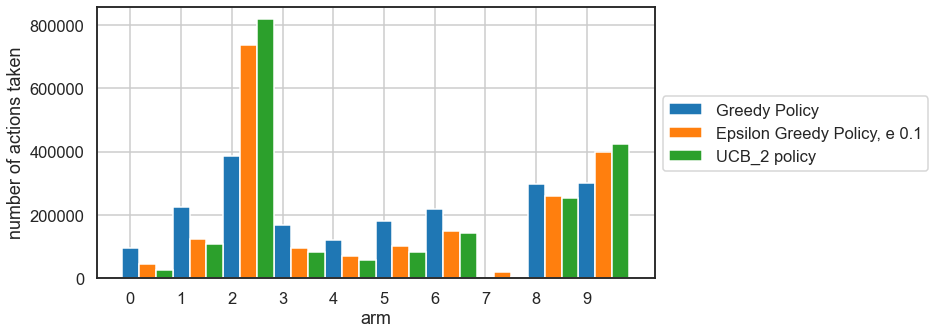

In [6]:
sim.plot_number_of_actions_taken(actions)

In [7]:
for arm in range(k):
    print(f"Arm {arm}: {mu[arm]}")

Arm 0: -0.18413531127259886
Arm 1: 0.5815635020641035
Arm 2: 2.0330279715020936
Arm 3: 0.31119572464582723
Arm 4: 0.26957989396588183
Arm 5: 0.4180412752822702
Arm 6: 0.7757834971489914
Arm 7: -2.094248270951716
Arm 8: 1.092512316983611
Arm 9: 1.462790099117249
